In [1]:

# INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20"
# OUTDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/results/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/clones_dendro"
# DONOR = 3
# COUNT_INDIR = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/donor3/mgatk"
# var_type = "mgatkdonor"

#INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/"


# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/cells_meta.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_mt_bestparams_af.0.1_othaf.0.1_cov.10_othcov.10_ncells.10_othncells.0.25_mean.0/clonalShift_method_mt_as_clones_dendro/single/"


cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/cells_meta.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/top"

clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"
ntop_clones = 10

#cloneID = "0_C6"

In [2]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})


plt.rcParams['svg.fonttype'] = 'none'

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch

In [4]:
clone_order = pd.read_csv(clone_order_f, header=None)[0].values
top_clones = clone_order[:ntop_clones]
top_clones

array(['0_0', '0_1', '0_2', '0_3', '0_4', '0_6', '0_5', '0_7', '0_9',
       '0_8'], dtype=object)

In [5]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta

,cloneID,clusterID,condition,donor
Control_AAACGAAAGCGAGAAA-1,0_27,MPP/CMP/GMP C,Control,0
Control_AAACGAAAGTACAGAT-1,0_4,erythroid,Control,0
Control_AAACGAACACTCGCAG-1,0_3,neutrophil,Control,0
Control_AAACGAATCAGGCGCT-1,0_23,macrophage,Control,0
Control_AAACGAATCCATCGAA-1,0_8,MPP/CMP/GMP C,Control,0
...,...,...,...,...
Input_TTTGTGTGTAGGGTCA-1,0_5,MPP/CMP/GMP B,Input,0
Input_TTTGTGTGTTTCTTAC-1,0_11,MPP/CMP/GMP B,Input,0
Input_TTTGTGTTCCTGAAAC-1,0_7,MEP,Input,0
Input_TTTGTGTTCGGGAAAC-1,0_25,MPP/CMP/GMP B,Input,0


## Filter for clone

In [6]:
norm_condition = cells_meta.groupby("condition").size()
norm_condition

norm_lineage = cells_meta.groupby("clusterID").size()
norm_lineage

clusterID
CLP               177
DC                199
MEP               310
MPP/CMP/GMP       968
MPP/CMP/GMP B    1353
MPP/CMP/GMP C     554
MPP/CMP/GMP D     182
eosonophil        692
erythroid         483
macrophage       1183
meg/erythroid     564
monocyte          382
neutrophil       1085
neutrophil B      487
dtype: int64

In [7]:
# for clone_id, curr_cells in cells_meta.groupby("cloneID"):
#     print(clone_id)

#     curr_dir = join(outdir, f"cloneID_{clone_id}")
#     if not exists(curr_dir):
#         os.mkdir(curr_dir)
        
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)

#     curr_cells_group = curr_cells.groupby(["clusterID", "condition"]).size().reset_index().pivot(index="clusterID", columns="condition", values=0).fillna(0)
#     curr_cells_group.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_condition_ncells.pdf"))
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)
#     curr_cells_group_norm = curr_cells_group.apply(lambda x: x/norm_condition.loc[x.name], axis=0)
#     curr_cells_group_norm.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_condition_ncells_norm.pdf"))
    
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)
#     curr_cells_lineage_group = curr_cells.groupby(["clusterID", "condition"]).size().reset_index().pivot(columns="clusterID", index="condition", values=0).fillna(0)
#     curr_cells_group_norm = curr_cells_lineage_group.apply(lambda x: x/norm_lineage.loc[x.name], axis=0)
#     curr_cells_lineage_group.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_lineage_splitCondition_ncells_norm.pdf"))
#     plt.close('all')

In [7]:
top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)]
top_cells_meta

,cloneID,clusterID,condition,donor
Control_AAACGAAAGTACAGAT-1,0_4,erythroid,Control,0
Control_AAACGAACACTCGCAG-1,0_3,neutrophil,Control,0
Control_AAACGAATCCATCGAA-1,0_8,MPP/CMP/GMP C,Control,0
Control_AAACGAATCTCGTAGA-1,0_3,erythroid,Control,0
Control_AAACTCGAGTGAAGGA-1,0_1,monocyte,Control,0
...,...,...,...,...
Input_TTTGGTTTCCAGCACG-1,0_5,MEP,Input,0
Input_TTTGTGTAGTTCGTTG-1,0_0,MPP/CMP/GMP,Input,0
Input_TTTGTGTCACACATTG-1,0_2,MPP/CMP/GMP B,Input,0
Input_TTTGTGTGTAGGGTCA-1,0_5,MPP/CMP/GMP B,Input,0


In [8]:
def plot_bar(data, **kwargs):
    f_df = data.pivot(index="clusterID", columns="condition", values=0).fillna(0)
    f_df.plot.bar(stacked=True, ax=plt.gca())
    return

In [9]:
top_clones

array(['0_0', '0_1', '0_2', '0_3', '0_4', '0_6', '0_5', '0_7', '0_9',
       '0_8'], dtype=object)

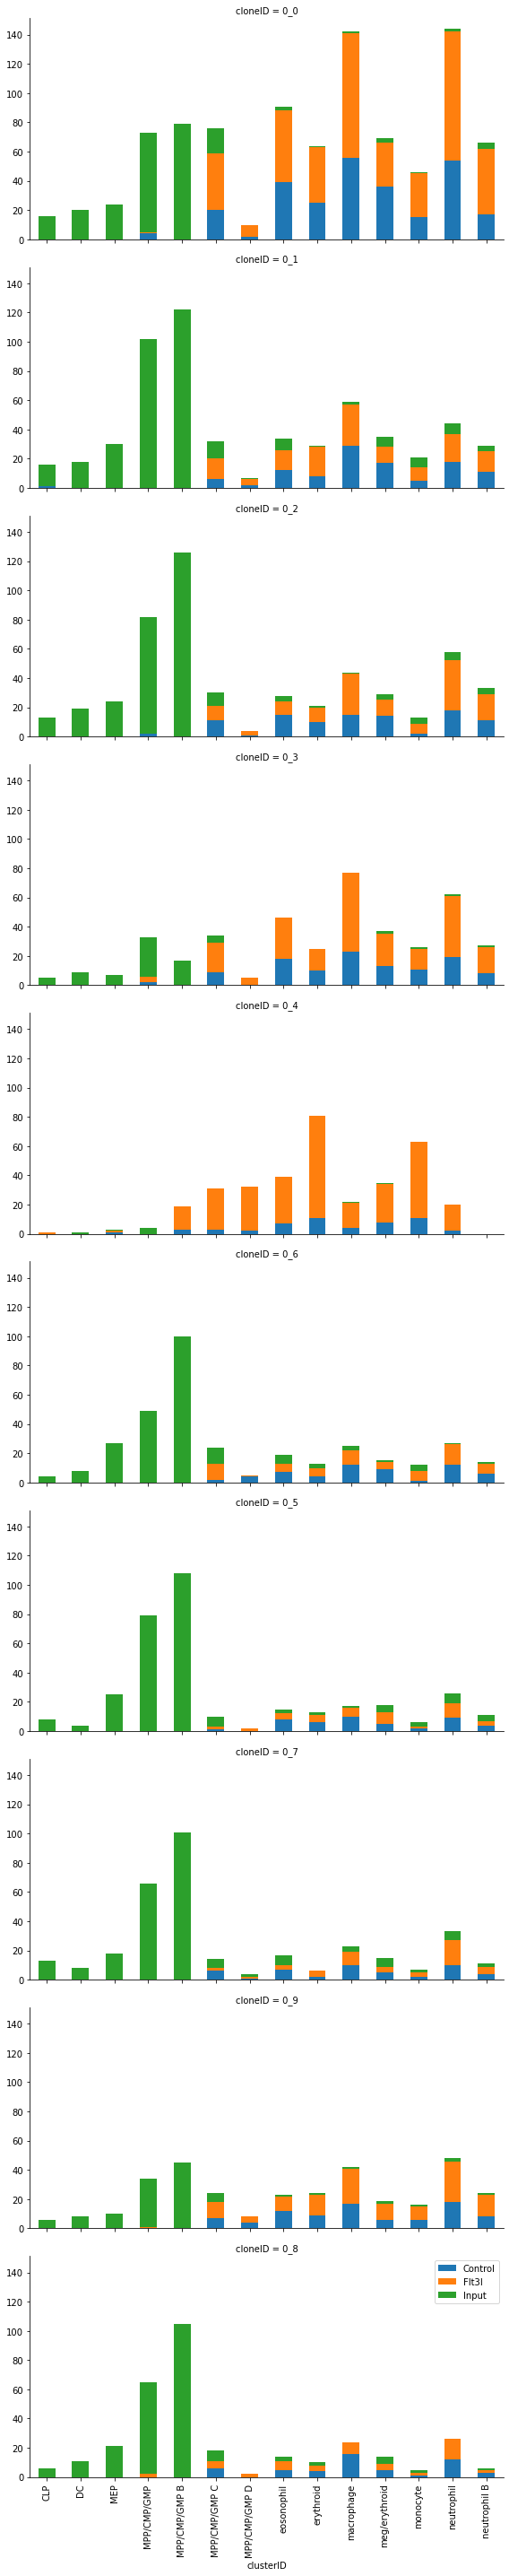

In [10]:
curr_cells_group = top_cells_meta.groupby(["clusterID", "cloneID", "condition"]).size().reset_index()
curr_cells_group

g = sns.FacetGrid(data=curr_cells_group, col="cloneID", col_order=top_clones, 
                  col_wrap=1, height=4, aspect=2)

g.map_dataframe(plot_bar, axis=1)

#              height=4*top_clones, width=2*4*top_clones
#.pivot(index="clusterID", columns="condition", values=0).fillna(0)
# curr_cells_group.plot.bar(stacked=True, ax=ax)
plt.legend(loc='best')
g.fig.savefig(fname=join(outdir, f"top_cluster_condition_ncells.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_cluster_condition_ncells.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


In [1]:
print(outdir)

NameError: name 'outdir' is not defined

In [6]:
# for clone_id, curr_cells in cells_meta.groupby("cloneID"):
#     print(clone_id)

#     curr_dir = join(outdir, f"cloneID_{clone_id}")
#     if not exists(curr_dir):
#         os.mkdir(curr_dir)
        
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)

#     curr_cells_group = curr_cells.groupby(["clusterID", "condition"]).size().reset_index().pivot(index="clusterID", columns="condition", values=0).fillna(0)
#     curr_cells_group.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_condition_ncells.pdf"))
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)
#     curr_cells_group_norm = curr_cells_group.apply(lambda x: x/norm_condition.loc[x.name], axis=0)
#     curr_cells_group_norm.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_condition_ncells_norm.pdf"))
    
#     f, ax = plt.subplots(figsize=(12,12), dpi=300)
#     curr_cells_lineage_group = curr_cells.groupby(["clusterID", "condition"]).size().reset_index().pivot(columns="clusterID", index="condition", values=0).fillna(0)
#     curr_cells_group_norm = curr_cells_lineage_group.apply(lambda x: x/norm_lineage.loc[x.name], axis=0)
#     curr_cells_lineage_group.plot.bar(stacked=True, ax=ax)
#     plt.savefig(join(curr_dir, "cluster_lineage_splitCondition_ncells_norm.pdf"))
#     plt.close('all')

0_C0
0_C1
0_C2
0_C3
0_C4
0_C5
0_C6
0_C7
0_C8
0_C9
